<h1><center>Non Linear Regression</center></h1>

<br><h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_data">Import the Data</a></li>
        <li><a href="#nonlinear_regression">Non-linear Regression</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

<h2 id='import_data'>Import the Data</h2>

In [3]:
#import the data

df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


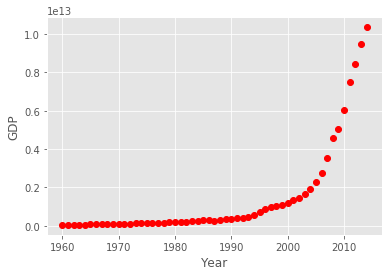

In [25]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

<h3>Choose the Model</h3>

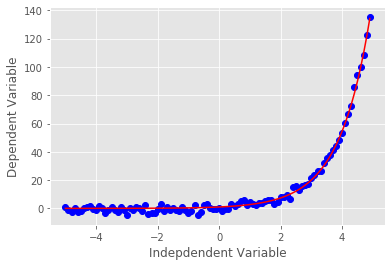

In [26]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)
y_noise = 2 * np.random.normal(size=X.size)
ydata = Y + y_noise

plt.plot(X,ydata,'bo') 
plt.plot(X,Y,'-r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<br><h2 id="nonlinear_regression">Non-linear Regression (Sigmoid function)</h2><br><br>

In [27]:
#Implementation

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y


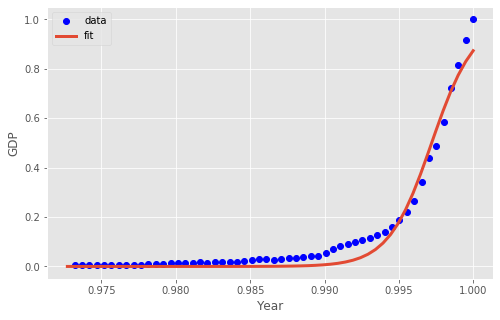

In [29]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

<br><h2 id='evaluation'>Evaluation</h2><br><br>

In [31]:

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97



<br>

End of notebook...
<hr>